In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data parsing

In [2]:
binning = np.linspace(0, 1083, 1084)
binning

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.081e+03, 1.082e+03,
       1.083e+03])

In [3]:
wavelengths = 3505 + 5*binning*1.1084
wavelengths

array([3505.   , 3510.542, 3516.084, ..., 9495.902, 9501.444, 9506.986])

In [4]:
star_1 = pd.read_csv('/media/olehryz/Elements/progs/univ_codes/2025_2026/01-atm/Planck/data/star1', delim_whitespace=True, names=['flux'], header=None)

star_1

,flux
0,53.831
1,55.702
2,55.961
3,55.788
4,57.095
...,...
1079,33.594
1080,33.235
1081,34.154
1082,34.290


### 1. Planck functions for OBAFGKM stars (normalized by the max value to 1.0)

In [5]:
def planck(wavelength, T):
    h = 6.62607015e-34  
    c = 2.99792458e8    
    k = 1.380649e-23    
    wl = wavelength * 1e-10
    numerator = 2 * h * c**2 / wl**5
    denominator = np.exp(h * c / (wl * k * T)) - 1
    return numerator / denominator

types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
temps = [35000, 20000, 9500, 7250, 5700, 4450, 3200]
colors = ['blue', 'deepskyblue', 'grey', 'yellow', 'orange', 'red', 'darkred']

/tmp/ipykernel_12497/3680649861.py:7: RuntimeWarning: overflow encountered in exp
  denominator = np.exp(h * c / (wl * k * T)) - 1


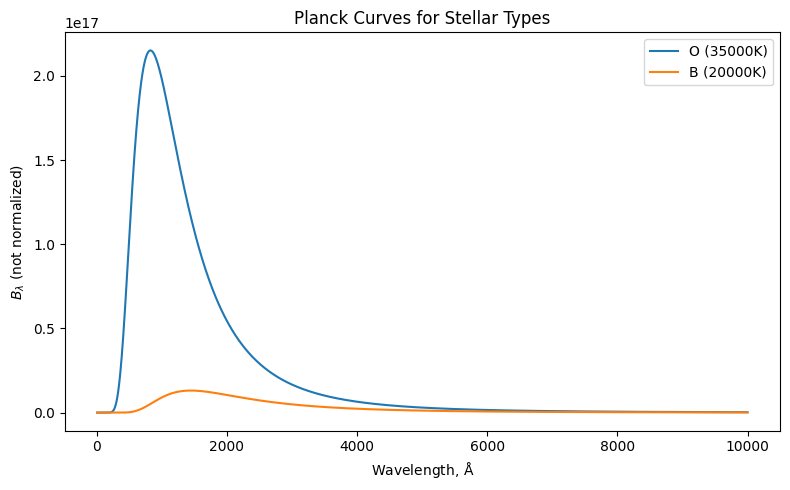

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

wave = np.arange(10, 10000, 1)

for t, T in zip(types[:2], temps[:2]):
    B = planck(wave, T)
    B_norm = B
    ax.plot(wave, B_norm, label=f'{t} ({T}K)')

ax.set_xlabel(r'Wavelength, ${\rm \AA}$')
ax.set_ylabel(r'$B_{\lambda}$ (not normalized)')
ax.set_title('Planck Curves for Stellar Types')
ax.legend()

# ax.set_yscale('log')

fig.tight_layout()
plt.show() 

/tmp/ipykernel_12497/3680649861.py:7: RuntimeWarning: overflow encountered in exp
  denominator = np.exp(h * c / (wl * k * T)) - 1


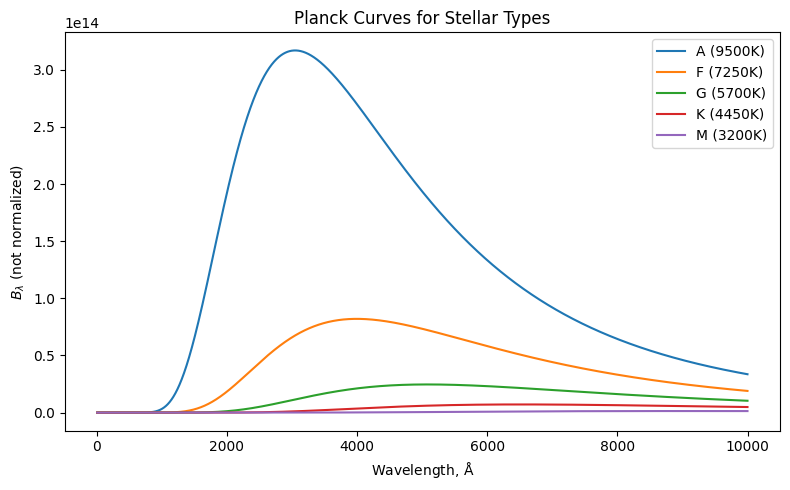

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

wave = np.arange(10, 10000, 1)

for t, T in zip(types[2:], temps[2:]):
    B = planck(wave, T)
    B_norm = B
    ax.plot(wave, B_norm, label=f'{t} ({T}K)')

ax.set_xlabel(r'Wavelength, ${\rm \AA}$')
ax.set_ylabel(r'$B_{\lambda}$ (not normalized)')
ax.set_title('Planck Curves for Stellar Types')
ax.legend()

# ax.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

wave = np.arange(10, 10000, 1)

for t, T in zip(types, temps):
    B = planck(wave, T)
    B_norm = B
    ax.plot(wave, B_norm, label=f'{t} ({T}K)')

ax.set_xlabel(r'Wavelength, ${\rm \AA}$')
ax.set_ylabel(r'$B_{\lambda}$ (not normalized)')
ax.set_title('Planck Curves for Stellar Types')
ax.legend()

# ax.set_yscale('log')

fig.tight_layout()
plt.show() 

### 2. Plotting the observed spectra, and visual fitting of Planck function by step-by-step iterating

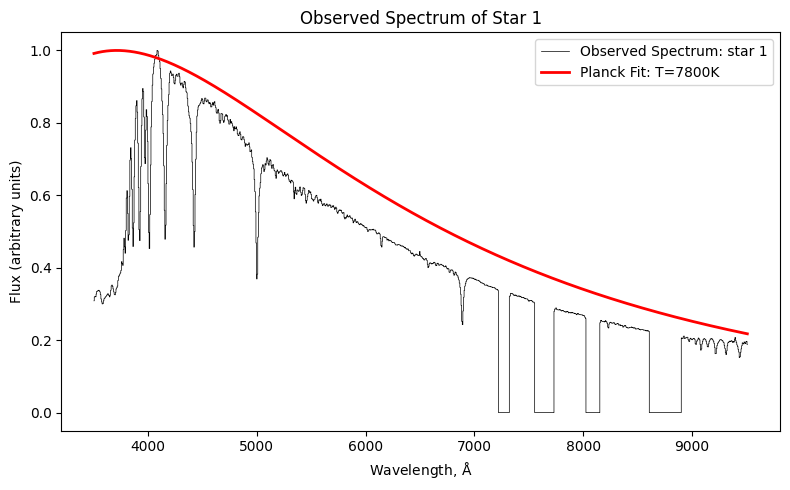

In [7]:
plt.figure(figsize=(8,5))

plt.plot(wavelengths, star_1['flux']/star_1['flux'].max(), color='black', drawstyle='steps-mid', lw=0.5, label='Observed Spectrum: star 1')
B = planck(wavelengths, 7800)
B_norm = B / B.max()
plt.plot(wavelengths, B_norm, color='red', lw=2, label='Planck Fit: T=7800K')
plt.legend()
plt.xlabel(r'Wavelength, ${\rm \AA}$')
plt.ylabel('Flux (arbitrary units)')
plt.title('Observed Spectrum of Star 1')
plt.tight_layout()
plt.show()

In [8]:
star_4 = pd.read_csv('/media/olehryz/Elements/progs/univ_codes/2025_2026/01-atm/Planck/data/star4', delim_whitespace=True, names=['flux'], header=None)

star_4

,flux
0,22.239
1,22.665
2,22.279
3,23.420
4,28.023
...,...
1079,71.973
1080,71.580
1081,71.671
1082,72.067


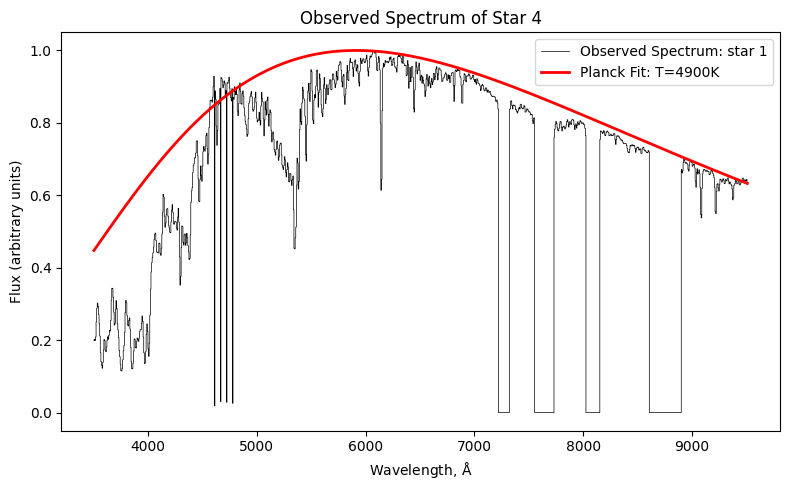

In [9]:
plt.figure(figsize=(8,5))

plt.plot(wavelengths, star_4['flux']/star_4['flux'].max(), color='black', drawstyle='steps-mid', lw=0.5, label='Observed Spectrum: star 1')
B = planck(wavelengths, 4900)
B_norm = B / B.max()
plt.plot(wavelengths, B_norm, color='red', lw=2, label='Planck Fit: T=4900K')
plt.legend()
plt.xlabel(r'Wavelength, ${\rm \AA}$')
plt.ylabel('Flux (arbitrary units)')
plt.title('Observed Spectrum of Star 4')
plt.tight_layout()
plt.show()

In [10]:
star_6 = pd.read_csv('/media/olehryz/Elements/progs/univ_codes/2025_2026/01-atm/Planck/data/star6', delim_whitespace=True, names=['flux'], header=None)

star_6

,flux
0,63.688
1,63.019
2,62.145
3,61.359
4,62.305
...,...
1079,47.451
1080,47.252
1081,47.283
1082,49.643


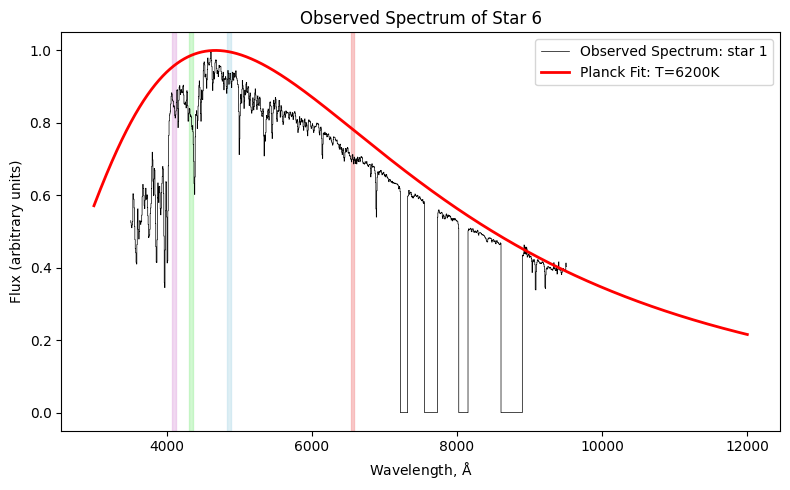

In [28]:
plt.figure(figsize=(8,5))

plt.plot(wavelengths, star_6['flux']/star_6['flux'].max(), color='black', drawstyle='steps-mid', lw=0.5, label='Observed Spectrum: star 1')
B = planck(np.arange(3000, 12000, 1), 6200)
B_norm = B / B.max()
plt.plot(np.arange(3000, 12000, 1), B_norm, color='red', lw=2, label='Planck Fit: T=6200K')
plt.legend()
plt.xlabel(r'Wavelength, ${\rm \AA}$')
plt.ylabel('Flux (arbitrary units)')
plt.title('Observed Spectrum of Star 6')
plt.tight_layout()

balmer_lines = {
    r'$H\alpha$': 6563,
    r'$H\beta$': 4861,
    r'$H\gamma$': 4341,
    r'$H\delta$': 4102
}
colors = ['lightcoral', 'lightblue', 'lightgreen', 'plum']

for (name, center), color in zip(balmer_lines.items(), colors):
    plt.axvspan(center-25, center+25, color=color, alpha=0.4, label=f'{name} region')

plt.show()